<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2010%20-%20Hyperbolic%20Equations/1001_Wave%20Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wave Equation
#### John S Butler john.s.butler@tudublin.ie   [Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)

## Overview
This notebook will implement the Forward Euler in time and Centered in space method to appoximate the solution of the wave equation.

## The Differential Equation
Condsider the one-dimensional hyperbolic Wave Equation:
\begin{equation}  \frac{\partial u}{\partial t} +a\frac{\partial u}{\partial x}=0,\end{equation}
where $a=1$, with the initial conditions
\begin{equation} u(x,0)=1-\cos(x), \ \ 0 \leq x \leq 2\pi. \end{equation}
with wrap around boundary conditions.



In [1]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math 

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


## Discete Grid
The region $\Omega$ is discretised into a uniform mesh $\Omega_h$. In the space $x$ direction into $N$ steps giving a stepsize of
\begin{equation} \Delta_x=\frac{2\pi-0}{N},\end{equation}
resulting in 
\begin{equation}x[j]=0+j\Delta_x, \ \ \  j=0,1,...,N,\end{equation}
and into $N_t$ steps in the time $t$ direction giving a stepsize of 
\begin{equation} \Delta_t=\frac{1-0}{N_t}\end{equation}
resulting in 
\begin{equation}t[n]=0+n\Delta_t, \ \ \ n=0,...,K.\end{equation}
The Figure below shows the discrete grid points for $N=10$ and $Nt=100$,  the known boundary conditions (green), initial conditions (blue) and the unknown values (red) of the Heat Equation.

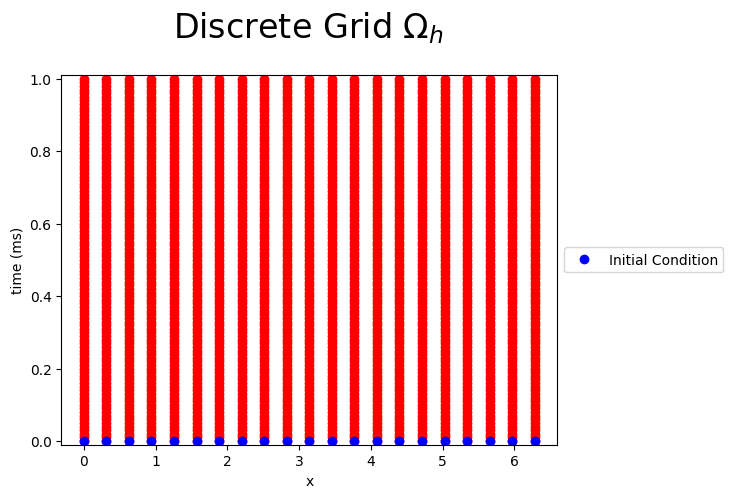

In [2]:
N=20
Nt=100
h=2*np.pi/N
k=1/Nt
time_steps=100
time=np.arange(0,(time_steps+.5)*k,k)
x=np.arange(0,2*np.pi+h/2,h)

X, Y = np.meshgrid(x, time)

fig = plt.figure()
plt.plot(X,Y,'ro');
plt.plot(x,0*x,'bo',label='Initial Condition');
plt.xlim((-h,2*np.pi+h))
plt.ylim((-k,max(time)+k))
plt.xlabel('x')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h$ ',fontsize=24,y=1.08)
plt.show();

## Initial Conditions

The discrete initial conditions is,
\begin{equation} w[0,j]=1-\cos(x[j]), \ \ 0 \leq x[j] \leq \pi, \end{equation}
The figure below plots values of $w[j,0]$ for the inital (blue) conditions for $t[0]=0.$

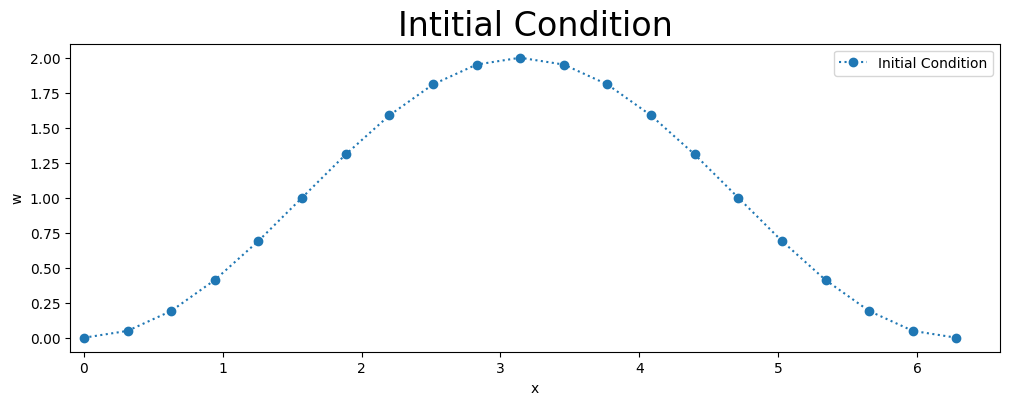

In [3]:
w=np.zeros((time_steps+1,N+1))
b=np.zeros(N-1)
# Initial Condition
for j in range (0,N+1):
    w[0,j]=1-np.cos(x[j])
    

fig = plt.figure(figsize=(12,4))
plt.plot(x,w[0,:],'o:',label='Initial Condition')
plt.xlim([-0.1,max(x)+h])
plt.title('Intitial Condition',fontsize=24)
plt.xlabel('x')
plt.ylabel('w')
plt.legend(loc='best')
plt.show()


## Boundary Conditions
To account for the wrap-around boundary conditions 
\begin{equation}w_{-1,n}=w_{N,n},\end{equation}
and
\begin{equation}w_{N+1,n}=w_{0,n}.\end{equation}

In [4]:
xpos = np.zeros(N+1)
xneg = np.zeros(N+1)

for j in range(0,N+1):
   xpos[j] = j+1
   xneg[j] = j-1

xpos[N] = 0
xneg[0] = N


## The Explicit Forward Time Centered Space  Difference Equation
The explicit Forward Time Centered Space difference equation of the Wave Equation is,
\begin{equation}
\frac{w^{n+1}_{j}-w^{n}_{j}}{\Delta_t}+\big(\frac{w^n_{j+1}-w^n_{j-1}}{2\Delta_x}\big)=0.
\end{equation}
Rearranging the equation we get,
\begin{equation}
w_{j}^{n+1}=w^{n}_{j}-\lambda a(w_{j+1}^{n}-w_{j-1}^{n}),
\end{equation}
for $j=0,...10$ where $\lambda=\frac{\Delta_t}{\Delta_x}$.

This gives the formula for the unknown term $w^{n+1}_{j}$ at the $(j,n+1)$ mesh points
in terms of $x[j]$ along the nth time row.

In [5]:
lamba=k/h
for n in range(0,time_steps):
    for j in range (0,N+1):
         w[n+1,j]=w[n,j]-lamba/2*(w[n,int(xpos[j])]-w[n,int(xneg[j])])
       
        

## Results

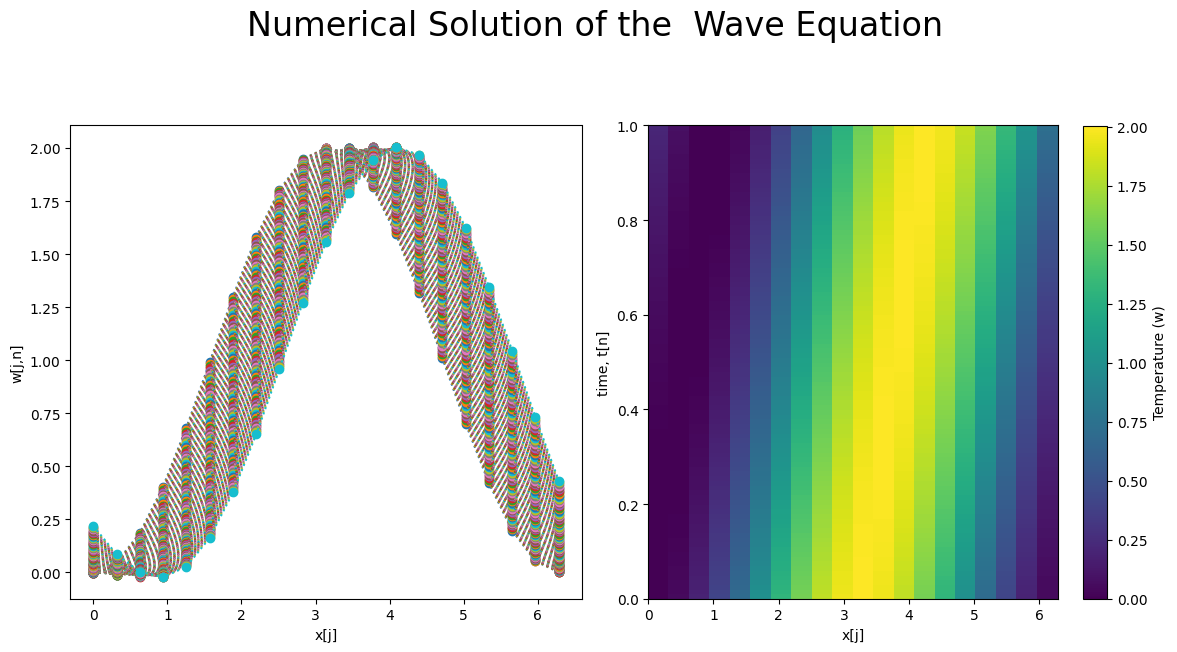

In [6]:
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
for n in range (1,time_steps+1):
    plt.plot(x,w[n,:],'o:')
plt.xlabel('x[j]')
plt.ylabel('w[j,n]')

plt.subplot(122)
X, T = np.meshgrid(x, time)
z_min, z_max = np.abs(w).min(), np.abs(w).max()


plt.pcolormesh( X,T, w, vmin=z_min, vmax=z_max)

#plt.xticks(np.arange(len(x[0:N:2])), x[0:N:2])
#plt.yticks(np.arange(len(time)), time)
plt.xlabel('x[j]')
plt.ylabel('time, t[n]')
clb=plt.colorbar()
clb.set_label('Temperature (w)')
#plt.colorbar()
plt.suptitle('Numerical Solution of the  Wave Equation',fontsize=24,y=1.08)
fig.tight_layout()
plt.show()


